In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [139]:
df = pd.read_csv('cricket_data.csv')

In [140]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5


In [5]:
df = df.rename(columns={'HS':'Highest Score','NO':'Not_outs','BF':'Balls_Faced','SR':'Strike_rate','Mat':'Matches'})

In [6]:
df.head()

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


In [7]:
df.head(20)

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
5,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202,6
6,E Paynter (ENG),1931-1939,20,31,5,1540,243,59.23,1288+,45.88,4,7,3,125,4
7,KF Barrington (ENG),1955-1968,82,131,15,6806,256,58.67,4957+,42.42,20,35,5,591,27
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,0.00,15,19,6,258,2
9,WR Hammond (ENG),1927-1947,85,140,16,7249,336*,58.45,7491+,38.07,22,24,4,419,27


In [8]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5


In [9]:
df.isnull().any()

Player           False
Span             False
Matches          False
Inns             False
Not_outs         False
Runs             False
Highest Score    False
Ave              False
Balls_Faced       True
Strike_rate      False
100              False
50               False
0                False
4s               False
6s               False
dtype: bool

In [10]:
df[df['Balls_Faced'].isna()==1].any()

Player            True
Span              True
Matches           True
Inns              True
Not_outs          True
Runs              True
Highest Score     True
Ave               True
Balls_Faced      False
Strike_rate      False
100               True
50                True
0                 True
4s                True
6s                True
dtype: bool

In [11]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [12]:
df[df['Balls_Faced'] == 0]

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.0,15,19,6,258,2
14,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,0.0,15,14,1,107,11
54,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,0.0,5,6,3,51,0


In [13]:
df[df['Player'].duplicated()==1].any()

Player           False
Span             False
Matches          False
Inns             False
Not_outs         False
Runs             False
Highest Score    False
Ave              False
Balls_Faced      False
Strike_rate      False
100              False
50               False
0                False
4s               False
6s               False
dtype: bool

In [14]:
df.drop_duplicates()

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5


In [15]:
date = df['Span'].str.split(
    '-')

In [16]:
df['start_year'] = df['Span'].str.split('-').str[0]

In [17]:
df['end_year'] = df['Span'].str.split('-').str[1]

In [18]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23,1965,1981
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0,1924,1934
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5,1930,1938


In [19]:
df.drop(['Span'], axis = 1)

,Player,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23,1965,1981
58,GC Smith (ICC/SA),117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014
59,WH Ponsford (AUS),29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0,1924,1934
60,SJ McCabe (AUS),39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5,1930,1938


In [20]:
df['country']= df['Player'].str.split('(').str[1]

In [21]:
df['Player'] = df['Player'].str.split('(').str[0]

In [22]:
df['Country']=df['country'].str.split(')').str[0]

In [23]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,country,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS),AUS
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG),ENG
2,AC Voges,2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS),AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA),SA
4,GA Headley,1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI),WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23,1965,1981,AUS),AUS
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA),ICC/SA
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0,1924,1934,AUS),AUS
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5,1930,1938,AUS),AUS


In [24]:
df.dtypes

Player            object
Span              object
Matches            int64
Inns               int64
Not_outs           int64
Runs               int64
Highest Score     object
Ave              float64
Balls_Faced       object
Strike_rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
start_year        object
end_year          object
country           object
Country           object
dtype: object

In [25]:
df['Highest Score'].str.split('*')

0       [334]
1       [186]
2     [269, ]
3       [274]
4     [270, ]
       ...   
57      [250]
58      [277]
59      [266]
60      [232]
61      [127]
Name: Highest Score, Length: 62, dtype: object

In [26]:
df['Highest Score'] =  df['Highest Score'].str.split('*').str[0]

In [27]:
df['Highest Score'] = df['Highest Score'].astype(int)

In [28]:
df.dtypes

Player            object
Span              object
Matches            int64
Inns               int64
Not_outs           int64
Runs               int64
Highest Score      int32
Ave              float64
Balls_Faced       object
Strike_rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
start_year        object
end_year          object
country           object
Country           object
dtype: object

In [29]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,country,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,1928,1948,AUS),AUS
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG),ENG
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS),AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,1963,1970,SA),SA
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416+,56.00,10,5,2,104,1,1930,1954,WI),WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23,1965,1981,AUS),AUS
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA),ICC/SA
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0,1924,1934,AUS),AUS
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5,1930,1938,AUS),AUS


In [30]:
df['Balls_Faced'] = df['Balls_Faced'].str.split('+').str[0]

In [31]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [32]:
df['Balls_Faced'] = df['Balls_Faced'].astype(int)

In [33]:
df.dtypes

Player            object
Span              object
Matches            int64
Inns               int64
Not_outs           int64
Runs               int64
Highest Score      int32
Ave              float64
Balls_Faced        int32
Strike_rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
start_year        object
end_year          object
country           object
Country           object
dtype: object

In [34]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,country,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS),AUS
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG),ENG
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS),AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA),SA
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI),WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS),AUS
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA),ICC/SA
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS),AUS
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS),AUS


In [35]:
df.drop(['country'], axis=1)

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS


In [36]:
df = df.astype({'start_year':'int','end_year':'int' })

In [37]:
df.dtypes

Player            object
Span              object
Matches            int64
Inns               int64
Not_outs           int64
Runs               int64
Highest Score      int32
Ave              float64
Balls_Faced        int32
Strike_rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
start_year         int32
end_year           int32
country           object
Country           object
dtype: object

In [38]:
# row delete

In [39]:
df = df.drop(45, axis = 0)

In [40]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,country,Country
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS),AUS
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG),ENG
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS),AUS
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA),SA
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI),WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS),AUS
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA),ICC/SA
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS),AUS
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS),AUS


In [41]:
df['career_length'] = df['end_year'] - df['start_year']

In [42]:
df

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,country,Country,career_length
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS),AUS,20
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG),ENG,1
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS),AUS,1
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA),SA,7
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI),WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS),AUS,16
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA),ICC/SA,12
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS),AUS,10
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS),AUS,8


In [43]:
dff = df.drop(['country'], axis=1)

In [95]:
def changename(country):
    if 'ICC' in country:
        words = country.split('/')
        return words[1] 
    else:
        return country 
    

In [98]:
dff['Country'] = dff['Country'].apply(changename)


In [99]:
dff

,Player,Span,Matches,Inns,Not_outs,Runs,Highest Score,Ave,Balls_Faced,Strike_rate,100,50,0,4s,6s,start_year,end_year,Country,career_length
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,1
2,AC Voges,2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,1930-1954,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters,1965-1981,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS,16
58,GC Smith,2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,SA,12
59,WH Ponsford,1924-1934,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS,10
60,SJ McCabe,1930-1938,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS,8


In [100]:
dff['career_length'].mean()

13.311475409836065

In [101]:
year_mean = dff['career_length'].mean()

In [102]:
year_mean = round(year_mean, 2)

In [103]:
year_mean

13.31

In [104]:
result = f'The avearge year span for the player list is {year_mean} years'

In [105]:
result

'The avearge year span for the player list is 13.31 years'

In [106]:
df_ten = dff[dff['career_length']>10]['Strike_rate'].mean()

In [107]:
ten = round(df_ten, 2)

In [108]:
ten

47.95

In [109]:
dff[dff['start_year']<1960]['Player'].count()

23

In [110]:
dff.groupby('Country')['Highest Score'].max().reset_index().sort_values(by ='Highest Score', ascending = False)

,Country,Highest Score
7,WI,400
0,AUS,380
6,SL,374
1,ENG,364
4,PAK,329
2,IND,319
5,SA,278
3,NZ,251
8,ZIM,232


In [111]:
dff.groupby('Country')['100','50','0'].mean()

C:\Users\danes\AppData\Local\Temp/ipykernel_71636/2408768519.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dff.groupby('Country')['100','50','0'].mean()


,100,50,0
Country,,,
AUS,21.266667,28.933333,8.866667
ENG,12.384615,20.846154,4.307692
IND,29.500000,40.166667,11.166667
NZ,18.500000,22.000000,6.000000
PAK,22.000000,31.600000,10.600000
SA,17.285714,28.142857,6.285714
SL,28.666667,44.000000,12.333333
WI,18.555556,28.111111,8.333333
ZIM,12.000000,27.000000,5.000000


In [112]:
max_player = dff.loc[dff['Runs'].idxmax()]['Player']

In [113]:
max_player

'SR Tendulkar '

In [114]:
max_bowls = dff.loc[dff['Balls_Faced'].idxmax()]['Player']

In [115]:
max_bowls

'R Dravid '

In [116]:
#Highest Strike Rate for a Batsman who has scored over 5000 runs

In [117]:
highest_str = dff[dff['Runs']>5000]

In [118]:
highest_str.loc[highest_str['Strike_rate'].idxmax()]['Player']

'V Sehwag '

In [119]:
# Number of player from each country

In [122]:
player_count_per_country = dff.groupby('Country')['Player'].count().reset_index()

Text(0.5, 1.0, 'Number of Players per Country')

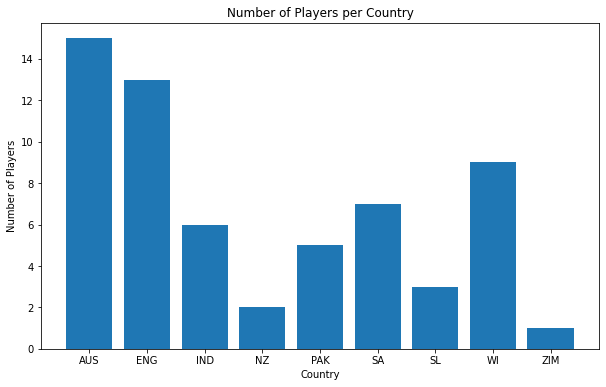

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(player_count_per_country['Country'], player_count_per_country['Player'])
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Number of Players per Country')

In [152]:
dff['career_length'] = pd.to_numeric(dff['career_length'])

In [153]:
avg_batting_avg = dff.groupby('career_length')['Ave'].mean().reset_index()

In [154]:
avg_batting_avg

,career_length,Ave
0,1,62.010000
1,2,51.680000
2,5,51.176667
3,6,48.000000
4,7,60.970000
5,8,53.490000
6,9,51.620000
7,10,52.790000
8,11,54.915000
9,12,50.547143


In [155]:
avg = avg_batting_avg.head(20)

In [164]:
correlation_coefficient = dff['career_length'].corr(dff['Ave'])

In [166]:
correlation_coefficient

0.0971953521737253

In [ ]:
#With a correlation coefficient of approximately 0.0972, it suggests a weak positive correlation between a player's career length and their batting average.

<BarContainer object of 21 artists>

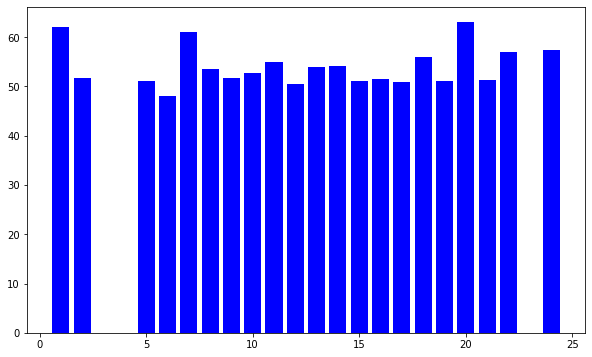

In [172]:
plt.figure(figsize=(10,6))
plt.bar(avg_batting_avg['career_length'], avg_batting_avg['Ave'], color = 'blue')

In [ ]:
# null Hypo = there is no correlation between career _lenght and batting average
# Alternative hypo = there is some correlation between career _lenght and batting average

In [184]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming df is your DataFrame containing the career length and batting average data
# Add a constant column for the intercept term
dff['intercept'] = 1

# Create independent variable (X) and dependent variable (y)
X = dff[['career_length', 'intercept']]
y = dff['Ave']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted batting averages
predicted_averages = model.predict(X)

# Calculate residuals
residuals = y - predicted_averages
p_values = model.pvalues

print("P-values:")
print(p_values)
print("Residuals:")
print(residuals)


P-values:
career_length    4.561615e-01
intercept        2.059654e-29
dtype: float64
Residuals:
0     45.429222
1     10.050428
2      9.770428
3      8.108994
4      5.811599
        ...    
57    -5.743156
58    -5.245534
59    -5.021723
60    -4.777911
61    -4.734100
Length: 61, dtype: float64


In [185]:
# so from the p-value(4.561615e-01) we cannot reject null hypothesis
# so we conculde that there is no corellation between career _lenght and batting average

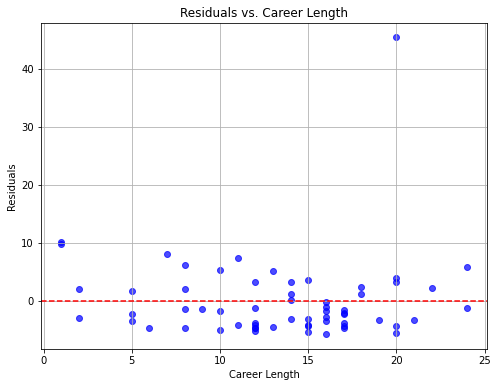

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(dff['career_length'], residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Residuals vs. Career Length')
plt.xlabel('Career Length')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

P-values:
[1.72925041e-16 7.36516835e-01]


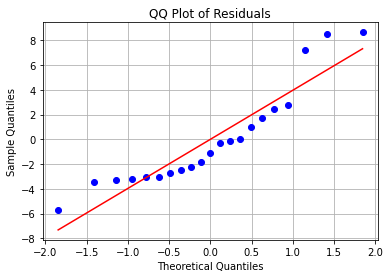

In [188]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
career_length = np.array([1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24])
batting_avg = np.array([62.01, 51.68, 51.176667, 48.0, 60.97, 53.49, 51.62, 52.79, 54.915, 50.547143, 53.91, 54.1175, 51.124, 51.49, 50.985, 56.02, 51.06, 63.022, 51.37, 56.94, 57.305])

# Fit linear regression model
X = sm.add_constant(career_length)  # Add constant for intercept
model = sm.OLS(batting_avg, X).fit()

# Calculate residuals
residuals = model.resid
p_values = model.pvalues
print("P-values:")
print(p_values)
# Generate QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


In [171]:
#from the qqplot we can see that residuals are not linear to the qqline so we can say that the model is not best fit.
